<a href="https://colab.research.google.com/github/UriB1/DL-CycleGAN-Monet2Photo/blob/main/Monet2Photo_Test_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CycleGAN: Photo to Monet Style Transfer

---

## Introduction

Welcome to this Google Colab notebook exploring CycleGAN, a powerful deep learning model for image-to-image translation. In this notebook, we'll focus on testing our trained CycleGAN model by transforming ordinary photographs into images resembling the style of paintings by the renowned artist Claude Monet.

### What is CycleGAN?

CycleGAN is a type of Generative Adversarial Network (GAN) designed for unpaired image-to-image translation. Unlike traditional methods that require paired examples of images in different styles for training, CycleGAN learns to translate images between two domains without any direct correspondences.

### Photo to Monet Style Transfer

The task of transforming photographs into Monet-style paintings is an example of unpaired image-to-image translation. In this case, we aim to convert everyday photographs into images that capture the distinct visual characteristics of Monet's paintings, such as vibrant colors, textured brushstrokes, and dreamy atmospheres.

CycleGAN achieves this transformation by simultaneously training two generators and two discriminators. The generators learn to translate images from one domain (photographs) to another (Monet-style paintings), while the discriminators distinguish between real and generated images. Through adversarial training and cycle-consistency loss, CycleGAN ensures that the translated images not only resemble the target style but also preserve the content of the original photographs.

In this notebook, we will implement a Photo to Monet style transfer, allowing you to create artistic transformations with just a few lines of code.

##Follow the instructions in each cell and run the cells by their order.

## Imports
In this cell you'll have to give this notebook an access to your Google Drive account in order to import necessary files.

In [ ]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

# Load necessary libraries
!pip install graphviz
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from keras.preprocessing.image import img_to_array, load_img
from PIL import Image
from tensorflow.keras.utils import plot_model

Mounted at /content/drive


## Load Components

* Save the following files in your Google Drive account:
 * [generator_photo2Monet](https://drive.google.com/file/d/1-OexcQm-L_g7Bfy9OCjzgekCQqOu5_24/view?usp=drive_link)
 * [generator_Monet2photo](https://drive.google.com/file/d/1-OYJAywxLO6oCGuqdroT2GMMuyo_GgXF/view?usp=drive_link)
 * [discriminator_photo](https://drive.google.com/file/d/1-a9moc46J8rw5fxuz6YhYMgBcIM1VZCw/view?usp=drive_link)
 * [discriminator_Monet](https://drive.google.com/file/d/1-_MQL8bddVYi9hRfXrbWDqJwhCj-cduu/view?usp=drive_link)

* Switch the paths below to the actual paths to your saved Google Drive files.

In [ ]:
generator_photo2Monet_path = "/content/drive/MyDrive/cyclegan_generator.keras"
generator_Monet2photo_path = "/content/drive/MyDrive/cyclegan_generator.keras"
discriminator_photo_path = "/content/drive/MyDrive/cyclegan_discriminator.keras"
discriminator_Monet_path = "/content/drive/MyDrive/cyclegan_discriminator.keras"

generator_photo2Monet = tf.keras.models.load_model(generator_photo2Monet_path)
generator_Monet2photo = tf.keras.models.load_model(generator_Monet2photo_path)
discriminator_photo = tf.keras.models.load_model(discriminator_photo_path)
discriminator_Monet = tf.keras.models.load_model(discriminator_Monet_path)

## Components Structure

**About The Generator's Structure:**

* Input Shape: The generator takes an input image with a shape of (320, 320, 3), representing a 3-channel image with dimensions 320x320 pixels.

* Encoder:
  * The input is passed through an encoder section, consisting of convolutional layers that downsample the input image.
  * The first convolutional layer has 64 filters, a kernel size of 7x7, and a stride of 1. It's followed by batch normalization and ReLU activation.
  * The second convolutional layer has 128 filters, a kernel size of 3x3, and a stride of 2, which downsamples the feature maps.

* Residual Blocks:
  * There are 12 residual blocks. Each block consists of two convolutional layers with 128 filters and a kernel size of 3x3.
  * Between the two convolutional layers, there's a dropout layer with a dropout rate of 0.5.
  * Each residual block has a skip connection (residual connection) where the input to the block is added to the output of the second convolutional layer.

* Decoder:
  * There are 2 transposed convolutional layers with 64 filters and a kernal size of 3, that upsample the feature maps.
  * Finally, there's a convolutional layer with a kernel size of 7 and a tanh activation function, which generates the output image.

* Output:
  * The output of the generator is an image with the same dimensions as the input image, with values ranging from -1 to 1 due to the tanh activation function.

While there are some variations from the traditional ResNet architecture (such as the inclusion of dropout), the presence of residual blocks with skip connections makes it reasonable to categorize this generator as a ResNet-like architecture.

Generator Photo to Monet:


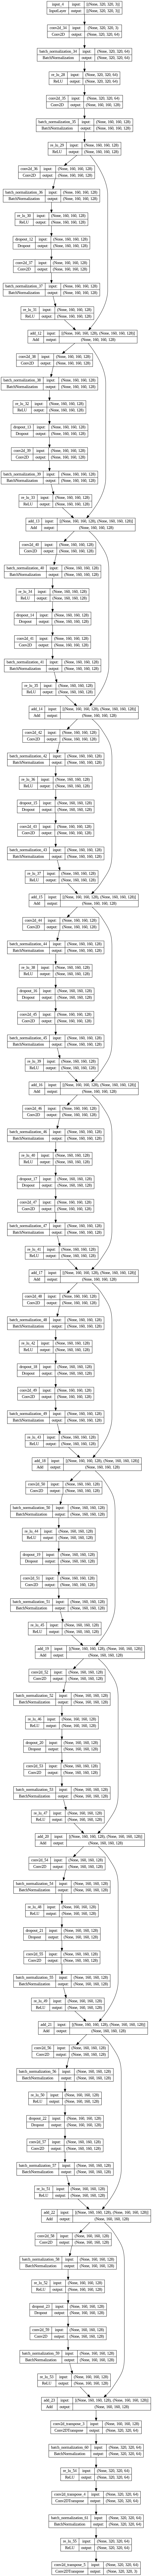

In [ ]:
print("Generator Photo to Monet:")
plot_model(generator_photo2Monet, to_file='generator_photo2Monet_model.png', show_shapes=True, show_layer_names=True)


Generator Monet to Photo:


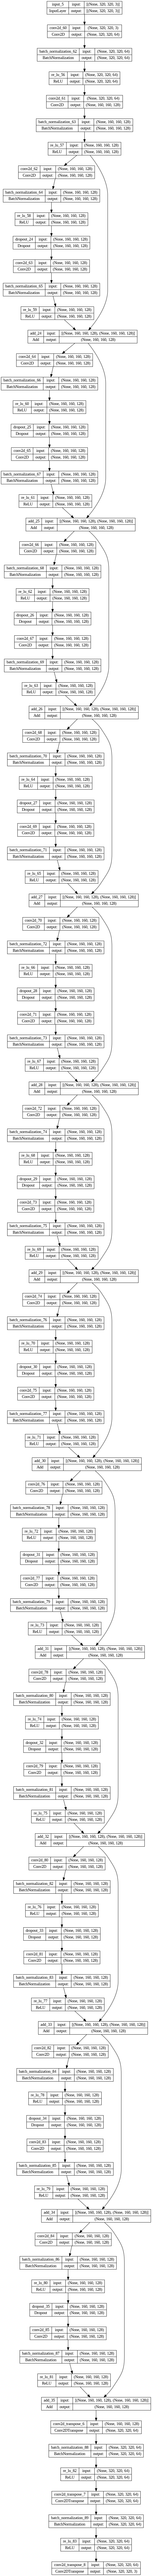

In [ ]:
print("\nGenerator Monet to Photo:")
plot_model(generator_Monet2photo, to_file='generator_Monet2photo_model.png', show_shapes=True, show_layer_names=True)

**About the discriminator structure:**

* Input:
  * The discriminator takes an input shape, which defaults to (320, 320, 3), representing an RGB image with a resolution of 320x320 pixels.

* Convolutional Layers:
  * The input passes through a series of convolutional layers.
  * The first convolutional layer has 64 filters with a specified kernel size (defaulting to 5x5), a stride of 2, and padding to maintain the spatial dimensions.
  * The second convolutional layer has 128 filters, and the third has 256 filters. Both layers have the same kernel size as before. The third convolutional layer has a stride of 1.
  * Batch normalization is applied after each convolutional layer to stabilize and accelerate training.
  * A leaky ReLU activation function with a slope of 0.2 is applied after batch normalization. Leaky ReLU is chosen to prevent the vanishing gradient problem and ensure that the gradients flow even for negative input values.

* Output Layer:

  * This layer has a single filter, indicating the discriminator's decision whether the input is real or fake.
  * The kernel size is set to 3x3, and the padding is chosen as 'valid', meaning no padding is applied. This configuration ensures that the output size is determined solely by the convolution operation.

* Output:
  * The output is a single-channel feature map representing the discriminator's decision, with higher values indicating the input is more likely to be real. This architecture is known as PatchGAN, and it helps in capturing local details and textures in the image, making the discriminator more sensitive to fine-grained differences between real and generated images.

* The receptive field size is 78x78.


Discriminator for Photo:


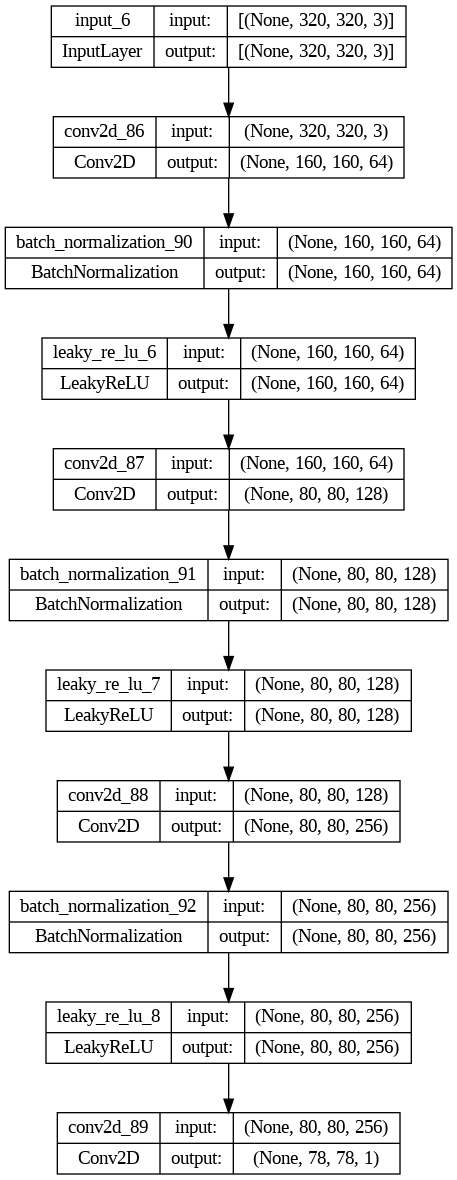

In [ ]:
print("\nDiscriminator for Photo:")
plot_model(discriminator_photo, to_file='discriminator_photo_model.png', show_shapes=True, show_layer_names=True)


Discriminator for Monet:


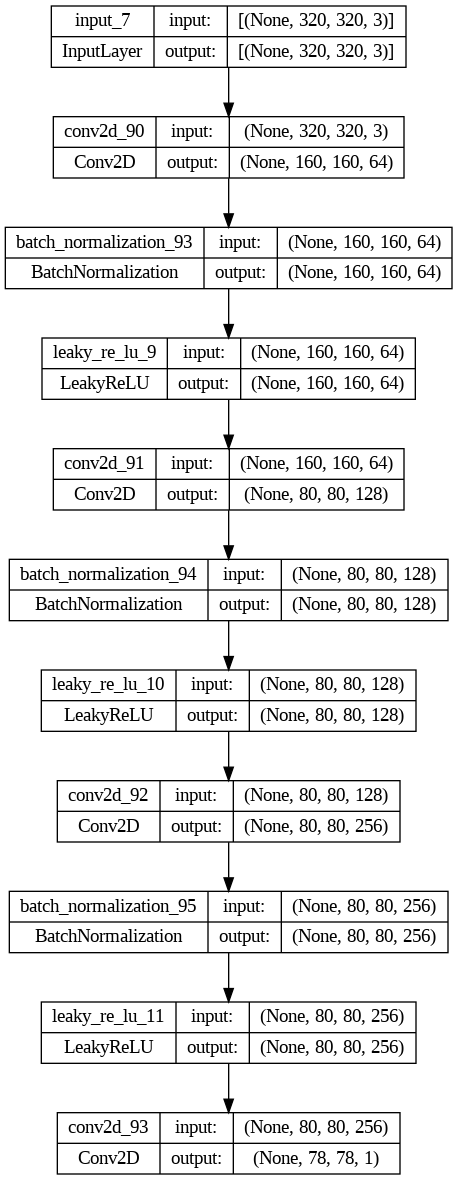

In [ ]:
print("\nDiscriminator for Monet:")
plot_model(discriminator_Monet, to_file='discriminator_Monet_model.png', show_shapes=True, show_layer_names=True)

## Convergence Graph



* Save the following [convergence graph file](https://drive.google.com/file/d/1-LexN6Yn8zIoxZb2TM5kcGFv-OP56yba/view?usp=drive_link) in your Google Drive account.

* Switch the path below to the actual path of your saved Google Drive file in order to display the convergence graph of the model.

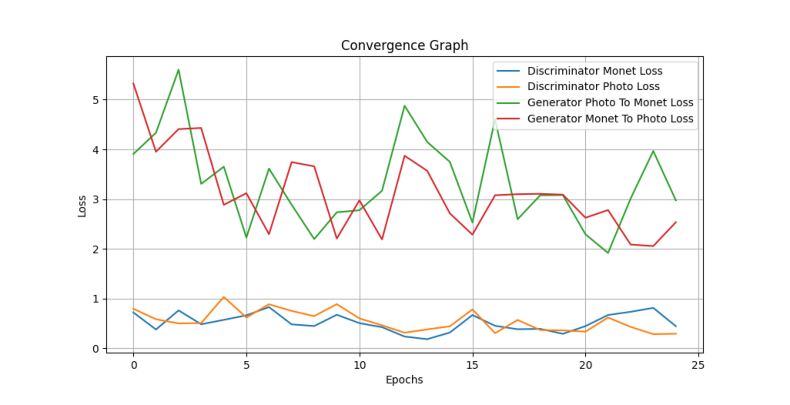

In [ ]:
convergence_path = "/content/drive/My Drive/convergence_graph_plot.png"

image = plt.imread(convergence_path)
plt.figure(figsize=(10, 5))
plt.imshow(image)
plt.axis('off')
plt.show()

##Image Samples


* This model MiFID result from Kaggle is 67.

* Save the following [sample file](https://drive.google.com/file/d/1-Y5NhM2LtjXmV45B-Djt7nWZ-F3pr7LR/view?usp=drive_link) in your Google Drive account.

* Switch the path below to the actual path to your saved Google Drive files to display some of the model results.

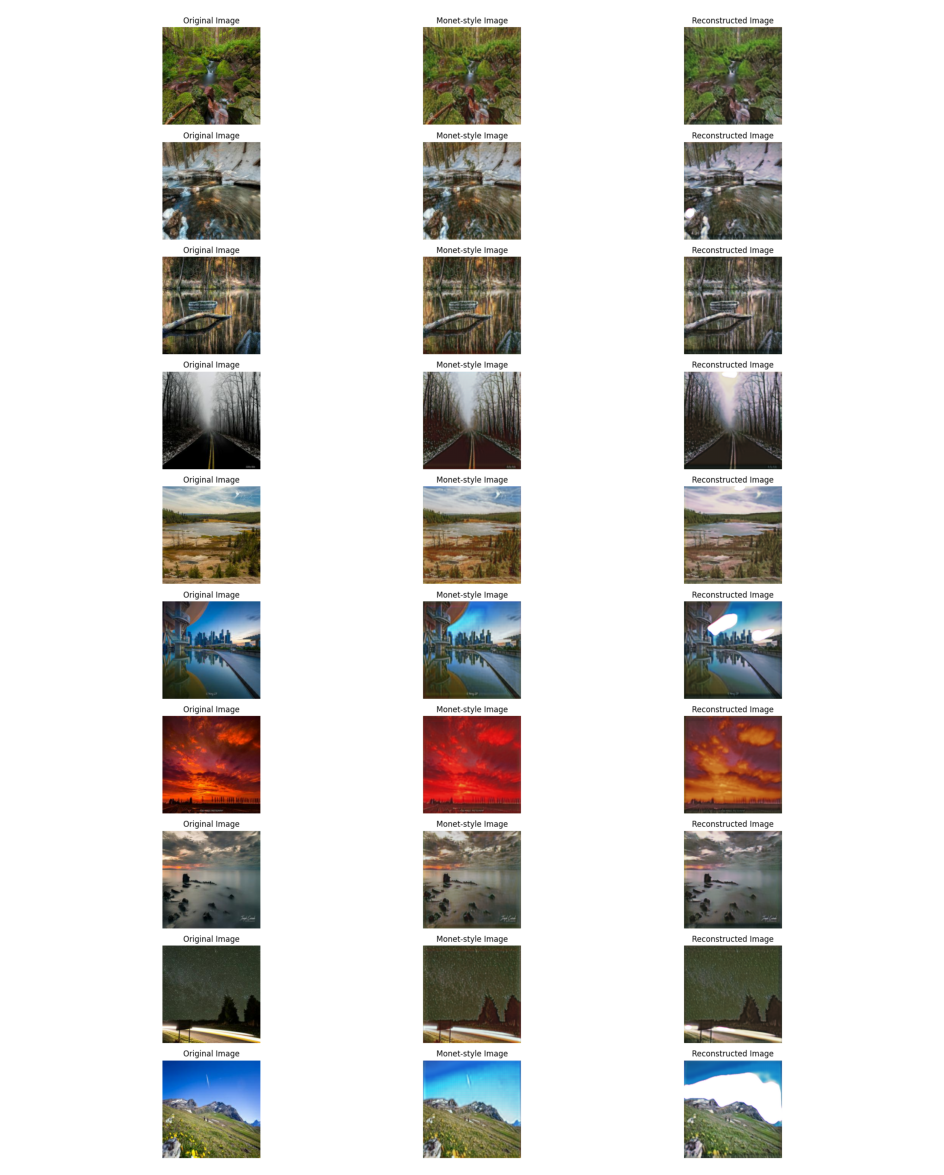

In [ ]:
sample_path = "/content/drive/My Drive/image_sample_plot.png"

image = plt.imread(sample_path)
plt.figure(figsize=(20, 15))
plt.imshow(image)
plt.axis('off')
plt.show()

## Translate an Image
Upload an image of your choosing to Google Colab and switch the path below to your actual image path.

In [ ]:
target_size = (320, 320)

photo_path = "/path/to/photo/image.jpeg"
photo_image = img_to_array(load_img(photo_path, target_size=target_size))
photo_image = (photo_image / 127.5) - 1

photo_df = pd.DataFrame({'image': [photo_image]})

original_image = np.expand_dims(photo_image, axis=0)

* Function to generate X-->Y images and Y-->X images.

* Generate Monet-style image and reconstructed image using the trained generator.

In [ ]:
def generate_new_images(images, generator):
    generated_images = generator(images, training=False)
    return generated_images

monet_style_image = generate_new_images(original_image, generator_photo2Monet)
reconstructed_image = generate_new_images(monet_style_image, generator_Monet2photo)

* Plot original image, Monet-style image, and reconstructed image.

* The code reshape or squeeze the image data if needed.

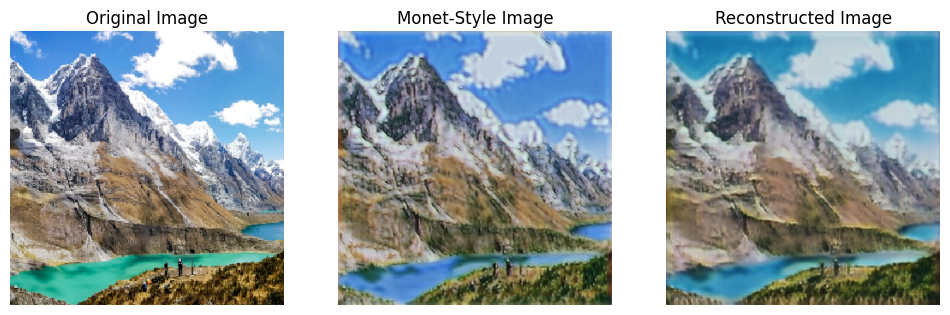

Wow you are a great painter!


In [ ]:
plt.figure(figsize=(12, 4))

original_image = np.squeeze(original_image)
monet_style_image = np.squeeze(monet_style_image)
reconstructed_image = np.squeeze(reconstructed_image)

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow((original_image + 1) / 2)
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Monet-Style Image')
plt.imshow((monet_style_image + 1) / 2)
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Reconstructed Image')
plt.imshow((reconstructed_image + 1) / 2)
plt.axis('off')

plt.show()
print("Wow you are a great painter!")